# Importing libraries and Global variables

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import re
from wordcloud import WordCloud
import nltk
nltk.download(['stopwords','punkt','wordnet', 'omw-1.4', 'vader_lexicon'])
##Imports for data re-sampling
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter
##IMPORTS TO VECTORIZE FEATURES
from sklearn.feature_extraction.text import CountVectorizer

#IMport to train a Naive_bayes classification model
from sklearn.naive_bayes import MultinomialNB


C:\Users\Ayoola\AppData\Roaming\Python\Python311\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Ayoola\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Ayoola\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Ayoola\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Ayoola\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Ayoola\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_l

In [2]:
stop_words = nltk.corpus.stopwords.words('english')
#Global variable
vectorizer = CountVectorizer()

# Initializing function and Training the model

In [3]:
#FUNCTION TO PROCESS DATASET
def preprocesss_text(text):
    tokenized_document = nltk.tokenize.RegexpTokenizer('[a-zA-Z0-9\']+').tokenize(text)
    cleaned_tokens = [word.lower() for word in tokenized_document if word.lower() not in stop_words]
    stemmed_text = [nltk.stem.WordNetLemmatizer().lemmatize(word) for word in cleaned_tokens]
    return stemmed_text

In [4]:
# FUNCTION TO BALANCE DATASET
def balance_dataset(X, y, strategy='auto'):
    # Determine the resampling strategy
    if strategy == 'auto':
        # Automatically determine the resampling strategy based on class distribution
        class_counts = Counter(y)
        minority_class = min(class_counts, key=class_counts.get)
        majority_class = max(class_counts, key=class_counts.get)
        if class_counts[minority_class] < class_counts[majority_class]:
            strategy = 'oversample'
        else:
            strategy = 'undersample'

    # Resample the dataset
    if strategy == 'oversample':
        oversampler = RandomOverSampler(sampling_strategy='minority')
        X_resampled, y_resampled = oversampler.fit_resample(X, y)
    elif strategy == 'undersample':
        undersampler = RandomUnderSampler(sampling_strategy='majority')
        X_resampled, y_resampled = undersampler.fit_resample(X, y)
    elif isinstance(strategy, dict):
        sampler = RandomOverSampler(sampling_strategy=strategy)
        X_resampled, y_resampled = sampler.fit_resample(X, y)
    else:
        raise ValueError("Invalid strategy. Please choose 'auto', 'oversample', 'undersample', or provide a sampling strategy dictionary.")

    return X_resampled, y_resampled


In [5]:
#Function to process data and calls the preprocess function
def process_data(file_path):
    # Read data from CSV
    data = pd.read_csv(file_path)
    
    # Apply preprocessing to 'Email' column
    data['processed_pitch'] = data['Email'].apply(preprocesss_text)
    
    X = vectorizer.fit_transform(data['processed_pitch'].map(''.join))
    
    # Convert to DataFrame
    X = pd.DataFrame(X.toarray())
    
    # Extract the target variable
    y = data['Pitch']
    
    return X, y

# Calling the function
X, y = process_data('pitchclassification.csv')

In [6]:
X_resampled, y_resampled = balance_dataset(X, y)

<Axes: xlabel='Pitch', ylabel='count'>

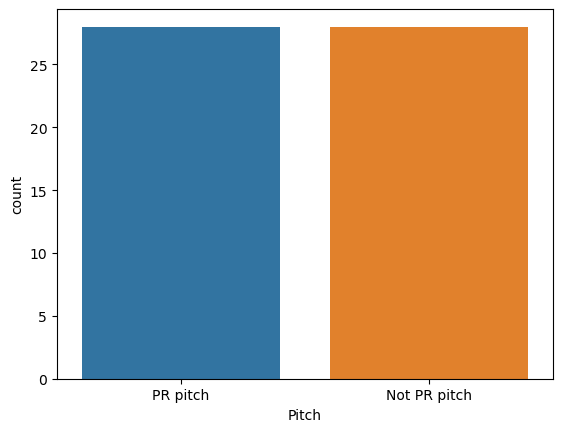

In [7]:
sns.countplot(x= y_resampled)

In [8]:
def train_model(X, y):
    # Initialize the model
    model = MultinomialNB()
    
    # Fit the model to the data
    model.fit(X, y)
    print(model)
    return model

#Training model by calling the function
trained_model = train_model(X_resampled, y_resampled)

MultinomialNB()


In [9]:
def predict_with_model(model, X_test):
    # Make predictions on the test data
    y_pred = model.predict(X_test)
    
    return y_pred

# Calling function to predict for new data
y_pred = predict_with_model(trained_model, X_resampled)

# Running the model on new Pitch to predict

In [10]:
def process_new_data(file_path):
    # Read data from CSV
    data = pd.read_csv(file_path)
    
    # Apply preprocessing to 'Email' column
    data['processed_pitch'] = data['Email'].apply(preprocesss_text)
    
    X = vectorizer.transform(data['processed_pitch'].map(''.join))
    
    # Convert to DataFrame
    X = pd.DataFrame(X.toarray())
    
    # Extract the target variable
    y = data['Pitch']
    
    return X, y

In [11]:
X_test, y_test = process_new_data('testsample.csv')

## Using the trained model to predict on the new dataset

In [12]:
y_pred = predict_with_model(trained_model, X_test)

## Viewing result

In [13]:
y_pred

array(['Not PR pitch', 'Not PR pitch', 'Not PR pitch'], dtype='<U12')

# Checking model accuracy

In [14]:
from sklearn import metrics
acc=metrics.accuracy_score(y_test,y_pred)

print('accuracy: %.2f\n\n'%(acc))

cm = metrics.confusion_matrix(y_test,y_pred)

print('Confusion Matrix:')
print(cm, '\n\n')

print("---------------------------------------------------------------")
result = metrics.classification_report(y_test,y_pred)

print('Classification Report: \n')

print(result)

accuracy: 1.00


Confusion Matrix:
[[3]] 


---------------------------------------------------------------
Classification Report: 

              precision    recall  f1-score   support

Not PR pitch       1.00      1.00      1.00         3

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3

